In [46]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.sandbox.stats.runs import mcnemar

In [11]:
# 9.1 Fisher's Exact Test: The Tea Experiment

# At a party, a lady claimed to be able to tell whether the tea or the milk was added
# first to a cup. Fisher proposed to give her eight cups, four of each variety, in random
# order. One could then ask what the probability was for her getting the number she
# got correct, but just by chance.

# The experiment provided the Lady with eight randomly ordered cups of tea—
# four prepared by first adding milk, four prepared by first adding the tea. She was to
# select the four cups prepared by one method. (This offered the Lady the advantage
# of judging cups by comparison.)

# The null hypothesis was that the Lady had no such ability. (In the real, historical
# experiment, the lady got all eight cups correct.)

# Calculate if the claim of the Lady is supported if she gets three out of the four
# pairs correct.

In [7]:
# The hypergeometric distribution models drawing objects from a bin.
# M - total number of cups of tea
# n - number of cups of tea with milk poured first
# N - number of cups of tea that the lady chooses
M, n, N = 8, 4, 4
hd = stats.hypergeom(M, n, N)
x = np.arange(0, N+1)
pmf_tea = hd.pmf(x)

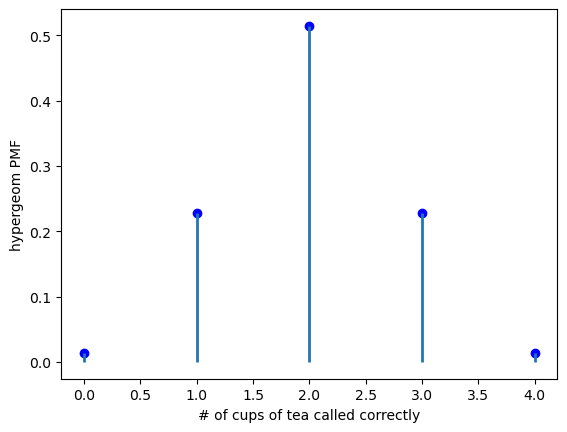

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_tea, 'bo')
ax.vlines(x, 0, pmf_tea, lw=2)
ax.set_xlabel('# of cups of tea called correctly')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [17]:
# We're interested in the probability that she gets three or greater correctly if she
# selects at random, which is:
p_correct = hd.pmf(3) + hd.pmf(4)
print(f"Probability of getting 3 or more cups correct is {p_correct:.2f}, which is greater than 0.05, so we retain the null hypothesis that the lady has no special ability.")

Probability of getting 3 or more cups correct is 0.24, which is greater than 0.05, so we retain the null hypothesis that the lady has no special ability.


In [23]:
# 9.2 Chi2 Contingency Test (1 DOF)

# A test of the effect of a new drug on the heart rate has yielded the following results.

# Does the drug affect the heart rate?
# What would be the result if the response of one of the not-treated persons would
# have been different? Perform this test with and without the Yates-correction.

|             | Heart rate |               |       |
|-------------|------------|---------------|-------|
|             | Increased  | Not-increased | Total |
| Treated     | 36         | 14            | 40    |
| Not treated | 30         | 25            | 55    |
| Total       | 66         | 39            | 105   |

In [22]:
data = np.array([[36, 14], [30, 25]])
V, p, dof, expected = stats.chi2_contingency(data)
print(f"p = {p:.2f} which is greater than 0.05, so columns are not contingent on rows, i.e. no effect of drug on heart rate.")

p = 0.10 which is greater than 0.05, so columns are not contingent on rows, i.e. no effect of drug on heart rate.


In [34]:
# The Yates correction is applied to mitigate the tendency of the chi-square test to overestimate 
# the significance of the association when the sample size is small. 
# It is used to reduce the likelihood of type I errors (false positives) by slightly downplaying
# the test's sensitivity.

data2 = np.array([[36, 14], [29, 26]])
_, p2, _, _ = stats.chi2_contingency(data2, correction=False)
_, p2_yates, _, _ = stats.chi2_contingency(data2, correction=True)
print(f"p2 = {p2:.2f}, and p2_yates = {p2_yates:.2f}")

p2 = 0.04, and p2_yates = 0.07


In [35]:
# 9.3 One Way Chi2-Test

# The city of Linz wants to know if people want to build a long beach along the
# Danube. They interview local people, and decide to collect 20 responses from each
# of the five age groups: (<15, 15–30, 30–45, 45–60, >60)
# The questionnaire states: “A beach-side development will benefit Linz.” and the
# possible answers are:

| 1              | 2     | 3        | 4                 |
|----------------|-------|----------|-------------------|
| Strongly agree | Agree | Disagree | Strongly disagree |

In [37]:
# The city council wants to find out if the age of people influenced feelings about
# the development, particularly of those who felt negatively (i.e., “disagreed” or
# “strongly disagreed”) about the planned development.

| Age group | Frequency of negative responses |
|-----------|---------------------------------|
| <15       | 4                               |
| 15-30     | 6                               |
| 30-45     | 14                              |
| 45-60     | 10                              |
| >60       | 16                              |

In [45]:
# The categories seem to show large differences of opinion between the groups.
# • Are these differences significant?
# • How many degrees of freedom does the resulting analysis have? 

freqs = np.array([4, 6, 14, 10, 16])
V, p = stats.chisquare(freqs)
print(f"p= {p:.2f} which is less than 0.05, so the differences are statistically significant.")
print(f"Resulting analysis has {len(freqs) - 1} dof.")

p= 0.03 which is less than 0.05, so the differences are statistically significant.
Resulting analysis has 4 dof.


In [40]:
# 9.4 McNemar’s Test

# In a lawsuit regarding a murder the defense uses a questionnaire to show that the
# defendant is insane. As a result of the questionnaire, the accused claims “not guilty
# by reason of insanity.”

# In reply, the state attorney wants to show that the questionnaire does not work.
# He hires an experienced neurologist, and presents him with 40 patients, 20 of whom
# have completed the questionnaire with an “insane” result, and 20 with a “sane”
# result. When examined by the neurologist, the result is mixed: 19 of the “sane”
# people are found sane, but 6 of the 20 “insane” people are labeled as sane by the
# expert.

0.03420269940871678

|        | Sane by expert | Insane by expert | Total |
|--------|----------------|------------------|-------|
| Sane   | 19             | 1                | 20    |
| Insane | 6              | 14               | 20    |
| Total  | 22             | 18               | 40    |

In [50]:
# Is this result significantly different from the questionnaire? 
# Would the result be significantly different, if the expert had diagnosed all “sane”
# people correctly? 

# The McNemar test examines the difference between the proportions that derive from the marginal sums
# of the table, i.e. (a + b) / N and (a + c) / N.

obs = [[19, 1], [6, 14]]
obs_correct = [[20, 0], [6, 14]]

_, p = mcnemar(obs)
_, p_correct = mcnemar(obs_correct)
print(f"p = {p:.2f} and p_correct = {p_correct:.2f}")

p = 0.12 and p_correct = 0.03


c:\Users\rich\miniconda3\envs\pydata-book\lib\site-packages\statsmodels\sandbox\stats\runs.py:542: FutureWarning: Deprecated, use stats.TableSymmetry instead
  warnings.warn("Deprecated, use stats.TableSymmetry instead", FutureWarning)
